<a href="https://colab.research.google.com/github/shrishtinigam/Chronic-Kidney-Disease-Prediction/blob/main/CKD_D1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

new_model dataset

In [ ]:
pip install tensorflow

In [ ]:
! wget /content/kidney_disease_train.csv

/content/kidney_disease_train.csv: Scheme missing.


In [ ]:
! head new_model.csv

Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
80,1.02,1,0,1,36,1.2,137.53,4.63,15.4,7800,5.2,1,1
50,1.02,4,0,1,18,0.8,137.53,4.63,11.3,6000,4.71,0,1
80,1.01,2,3,1,53,1.8,137.53,4.63,9.6,7500,4.71,0,1
70,1.005,4,0,1,56,3.8,111,2.5,11.2,6700,3.9,1,1
80,1.01,2,0,1,26,1.4,137.53,4.63,11.6,7300,4.6,0,1
90,1.015,3,0,1,25,1.1,142,3.2,12.2,7800,4.4,1,1
70,1.01,0,0,1,54,24,104,4,12.4,8406,4.71,0,1
76,1.015,2,4,1,31,1.1,137.53,4.63,12.4,6900,5,0,1
100,1.015,3,0,1,60,1.9,137.53,4.63,10.8,9600,4,1,1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = np.loadtxt('new_model.csv',delimiter=',',skiprows=1)
dataset_pd = pd.read_csv('new_model.csv')
# Shuffling data
# np.random.shuffle(dataset)

# Exploratory Data Analysis 

In [ ]:
print(dataset.shape)

(400, 14)


In [ ]:
fig = plt.figure(figsize =(10, 7))
blood_pressure = dataset[:,0]
specific_gravity_urine = dataset[:,1]
albumin = dataset[:,2]
sugar = dataset[:,3]
red_blood_cells = dataset[:,4] # presence of rbc's
blood_urea = dataset[:,5]
serum_creatinine = dataset[:,6]
sodium = dataset[:,7]
potassium = dataset[:,8]
hemoglobin = dataset[:,9]
white_blood_cell_count = dataset[:,10]
red_blood_cell_count = dataset[:,11]
hypertension = dataset[:,12]

<Figure size 720x504 with 0 Axes>

Blood Pressure


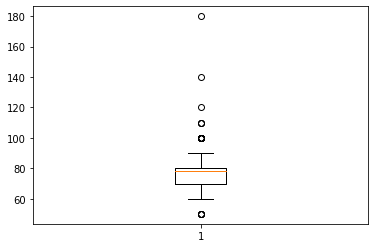

In [ ]:
plt.boxplot(blood_pressure)
print("Blood Pressure")

Specific Gravity of Urine


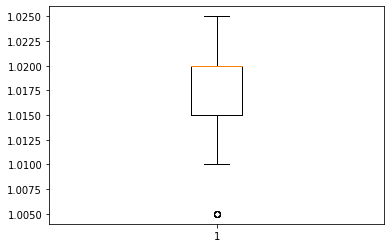

In [ ]:
plt.boxplot(specific_gravity_urine)
print("Specific Gravity of Urine")

Albumin


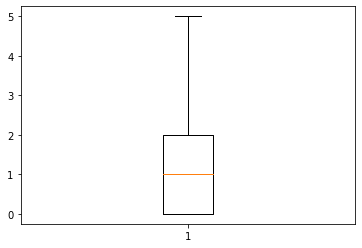

In [ ]:
plt.boxplot(albumin)
print("Albumin")

'\nplt.hist(albumin)\nplt.hist(specific_gravity_urine)\n'

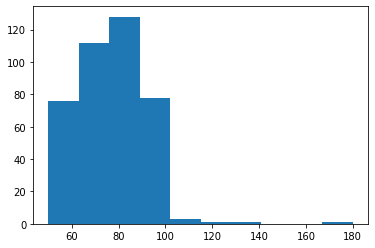

In [ ]:
# We can visulize the box plots for all attributes 
"""
plt.boxplot(sugar)
plt.boxplot(red_blood_cells)
plt.boxplot(blood_urea)
"""
# We can visulaize the histograms for all attributes
plt.hist(blood_pressure)
"""
plt.hist(albumin)
plt.hist(specific_gravity_urine)
"""

In [ ]:
dataset_pd.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [ ]:
# Rows that have identical data are probably useless, if not dangerously misleading during model evaluation.
duplicates = dataset_pd.duplicated()
duplicates.sum()

0

In [ ]:
print(dataset_pd)

     Bp     Sg  Al  Su  Rbc    Bu   Sc     Sod   Pot  Hemo  Wbcc  Rbcc  Htn  \
0    80  1.020   1   0    1  36.0  1.2  137.53  4.63  15.4  7800  5.20  1.0   
1    50  1.020   4   0    1  18.0  0.8  137.53  4.63  11.3  6000  4.71  0.0   
2    80  1.010   2   3    1  53.0  1.8  137.53  4.63   9.6  7500  4.71  0.0   
3    70  1.005   4   0    1  56.0  3.8  111.00  2.50  11.2  6700  3.90  1.0   
4    80  1.010   2   0    1  26.0  1.4  137.53  4.63  11.6  7300  4.60  0.0   
..   ..    ...  ..  ..  ...   ...  ...     ...   ...   ...   ...   ...  ...   
395  80  1.020   0   0    1  49.0  0.5  150.00  4.90  15.7  6700  4.90  0.0   
396  70  1.025   0   0    1  31.0  1.2  141.00  3.50  16.5  7800  6.20  0.0   
397  80  1.020   0   0    1  26.0  0.6  137.00  4.40  15.8  6600  5.40  0.0   
398  60  1.025   0   0    1  50.0  1.0  135.00  4.90  14.2  7200  5.90  0.0   
399  80  1.025   0   0    1  18.0  1.1  141.00  3.50  15.8  6800  6.10  0.0   

     Class  
0        1  
1        1  
2        1  

In [ ]:
df_num = dataset_pd[['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn']]
df_num.corr()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn
Bp,1.000000,-0.164057,0.146060,0.190277,-0.151478,0.184173,0.144469,-0.103383,0.066791,-0.279441,0.025963,-0.220827,0.268003
Sg,-0.164057,1.000000,-0.460835,-0.292053,0.253894,-0.249263,-0.176141,0.217456,-0.063450,0.492103,-0.206880,0.443437,-0.318956
Al,0.146060,-0.460835,1.000000,0.262564,-0.374484,0.405035,0.229396,-0.270709,0.114484,-0.548681,0.200664,-0.454131,0.478309
Su,0.190277,-0.292053,0.262564,1.000000,-0.092940,0.126074,0.094568,-0.053448,0.180098,-0.156875,0.159033,-0.163825,0.253179
Rbc,-0.151478,0.253894,-0.374484,-0.092940,1.000000,-0.236270,-0.138391,0.140568,0.018164,0.280991,-0.002205,0.202298,-0.139342
Bu,0.184173,-0.249263,0.405035,0.126074,-0.236270,1.000000,0.581176,-0.307357,0.336954,-0.540699,0.041530,-0.465947,0.387503
Sc,0.144469,-0.176141,0.229396,0.094568,-0.138391,0.581176,1.000000,-0.624493,0.205361,-0.342053,-0.005420,-0.323056,0.273904
Sod,-0.103383,0.217456,-0.270709,-0.053448,0.140568,-0.307357,-0.624493,1.000000,0.067414,0.333604,0.006334,0.316883,-0.306501
Pot,0.066791,-0.063450,0.114484,0.180098,0.018164,0.336954,0.205361,0.067414,1.000000,-0.100612,-0.074057,-0.120418,0.057028
Hemo,-0.279441,0.492103,-0.548681,-0.156875,0.280991,-0.540699,-0.342053,0.333604,-0.100612,1.000000,-0.153806,0.681864,-0.576932


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ace777110>,
      dtype=object)

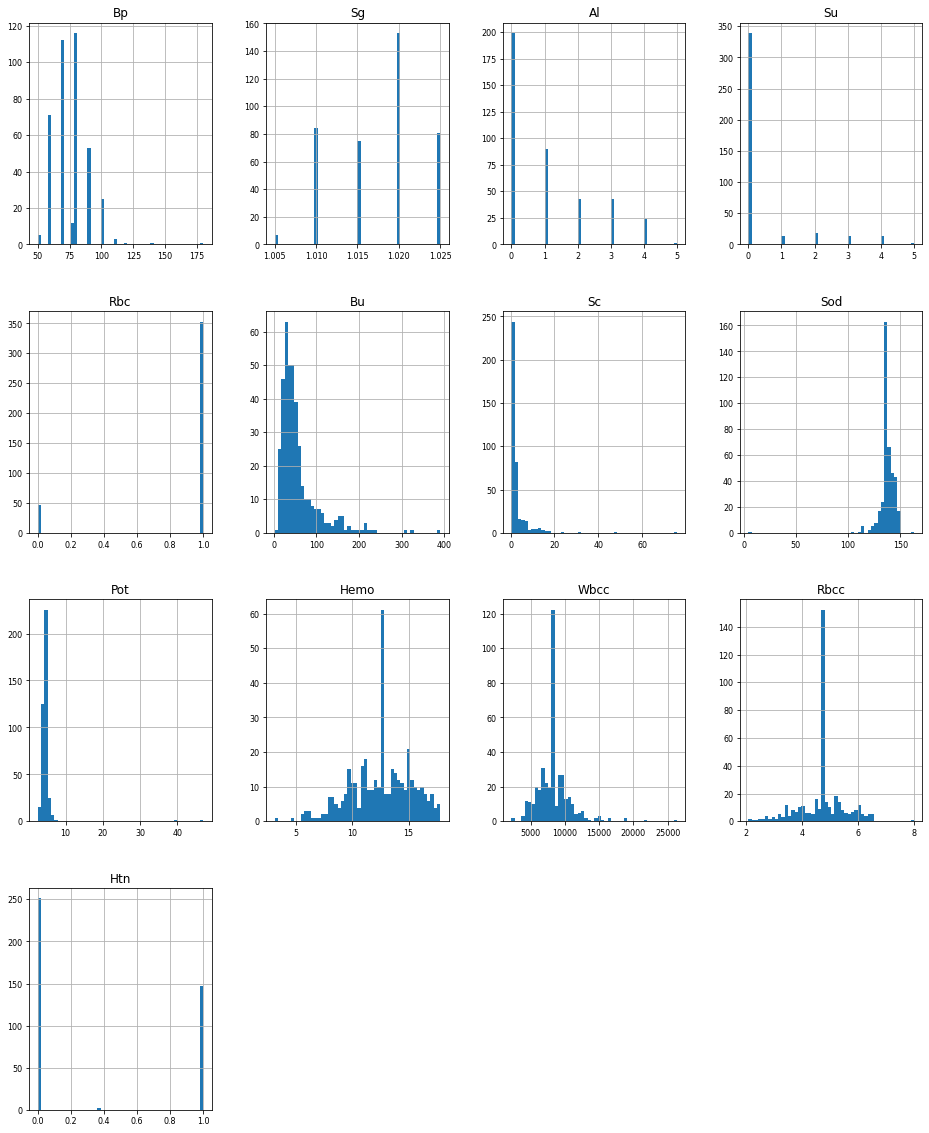

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
np.set_printoptions(formatter={'float': '{:0.2f}'.format})

In [ ]:
X = dataset[:, :-1] # All rows, all columns except last one
Y = dataset[:,-1] # All rows, only last column

In [ ]:
print(X.shape,Y.shape)

(400, 13) (400,)


In [ ]:
# Manually normalizing the data -
"""
mean = X.mean(axis=0)
X = X - mean
std = X.std(axis=0)
X = X/std
print(X[:10])
"""

'\nmean = X.mean(axis=0)\nX = X - mean\nstd = X.std(axis=0)\nX = X/std\nprint(X[:10])\n'

In [ ]:
# Scaling dataset using MinMaxScaler and Robust Scaler

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

# Importing Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler(feature_range=(0,1))   
# scaler = RobustScaler()   
scaled_X = scaler.fit_transform(X)
X = scaled_X
print(X[:10])


# Splitting into train and test data - 80% train, 20% test
split_pct = int(0.8*len(X))
train_X, test_X = X[:split_pct], X[split_pct:]
train_Y, test_Y = Y[:split_pct], Y[split_pct:]
print("\n\n")
print(train_X[:10])

[[0.23 0.75 0.20 0.00 1.00 0.09 0.01 0.84 0.05 0.84 0.23 0.53 1.00]
 [0.00 0.75 0.80 0.00 1.00 0.04 0.01 0.84 0.05 0.56 0.16 0.44 0.00]
 [0.23 0.25 0.40 0.60 1.00 0.13 0.02 0.84 0.05 0.44 0.22 0.44 0.00]
 [0.15 0.00 0.80 0.00 1.00 0.14 0.04 0.67 0.00 0.55 0.19 0.31 1.00]
 [0.23 0.25 0.40 0.00 1.00 0.06 0.01 0.84 0.05 0.58 0.21 0.42 0.00]
 [0.31 0.50 0.60 0.00 1.00 0.06 0.01 0.87 0.02 0.62 0.23 0.39 1.00]
 [0.15 0.25 0.00 0.00 1.00 0.13 0.31 0.63 0.03 0.63 0.26 0.44 0.00]
 [0.20 0.50 0.40 0.80 1.00 0.08 0.01 0.84 0.05 0.63 0.19 0.49 0.00]
 [0.38 0.50 0.60 0.00 1.00 0.15 0.02 0.84 0.05 0.52 0.31 0.32 1.00]
 [0.31 0.75 0.40 0.00 0.00 0.27 0.09 0.69 0.03 0.44 0.41 0.27 1.00]]



[[0.23 0.75 0.20 0.00 1.00 0.09 0.01 0.84 0.05 0.84 0.23 0.53 1.00]
 [0.00 0.75 0.80 0.00 1.00 0.04 0.01 0.84 0.05 0.56 0.16 0.44 0.00]
 [0.23 0.25 0.40 0.60 1.00 0.13 0.02 0.84 0.05 0.44 0.22 0.44 0.00]
 [0.15 0.00 0.80 0.00 1.00 0.14 0.04 0.67 0.00 0.55 0.19 0.31 1.00]
 [0.23 0.25 0.40 0.00 1.00 0.06 0.01 0.84 0.

In [ ]:
blood_pressure = X[:,0]
specific_gravity_urine = X[:,1]
albumin = X[:,2]

Blood Pressure


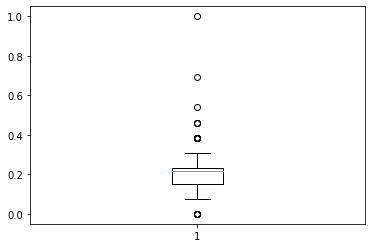

In [ ]:
plt.boxplot(blood_pressure)
print("Blood Pressure")

Specific Gravity of Urine


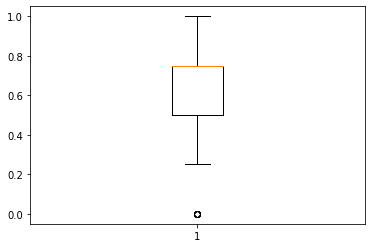

In [ ]:
plt.boxplot(specific_gravity_urine)
print("Specific Gravity of Urine")

Albumin


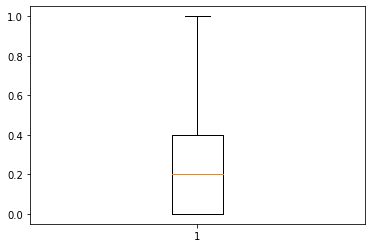

In [ ]:
plt.boxplot(albumin)
print("Albumin")

(array([76.00, 112.00, 128.00, 78.00, 3.00, 1.00, 1.00, 0.00, 0.00, 1.00]),
 array([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00]),
 <a list of 10 Patch objects>)

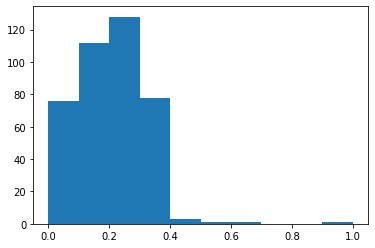

In [ ]:
plt.hist(blood_pressure)

# Sequential Model in Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(8,input_dim=len(train_X[0,:]),activation='relu'))
model.add(Dense(4,activation='relu')) # y = max(0, x)
#model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # y = 1 / 1+e^ -z

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

# Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. Efficient when working with large problem involving a lot of data or parameters. 
# Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.
# rmsprop -> Root Mean Squared Propagation
# The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels

In [ ]:
model.fit(x=train_X,y=train_Y,epochs=256,verbose=1)

Epoch 1/256
10/10 [==============================] - 1s 2ms/step - loss: 0.7178 - accuracy: 0.3562
Epoch 2/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4906
Epoch 3/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6313
Epoch 4/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7312
Epoch 5/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7750
Epoch 6/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7750
Epoch 7/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7781
Epoch 8/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.7781
Epoch 9/256
10/10 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7781
Epoch 10/256
10/10 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7812
Epoch 11/

In [ ]:
prediction = model.predict(test_X)

In [ ]:
# Less than 0.5, No. More than 0.5, Yes.
print(prediction[:5])

[[0.16]
 [0.18]
 [0.33]
 [0.16]
 [0.37]]


In [ ]:
print(test_Y[:5])

[0.00 0.00 0.00 0.00 0.00]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(test_Y,prediction.round()) 

In [ ]:
print(accuracy)

1.0
